<a href="https://colab.research.google.com/github/SylviaNice/BottleNeck/blob/main/Notebook_BottelNeck_final2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analyse des ventes de vin BottleNeck**

Objectifs :

- Détecter les incohérences dans les fichiers erp / web et liaison
- Fusionner les 3 fichiers en un seul fichier
- Vérifier la cohérence des ventes et calculer le CA
- Examiner la distribution des prix du vin et les outliers de prix

Plan de ce notebook :

1. Nettoyage de l'environnement  
2. Installation des bibliothèques  
3. Importation des données  
4. Chargement des fichiers  
5. Lecture des fichiers  
6. Aperçu du fichier erp  
7. Aperçu du fichier liaison  
8. Aperçu du fichier web  
9. Nettoyage du fichier erp  
10. Nettoyage du fichier liaison  
11. Nettoyage du fichier web  
12. Fusion des 3 fichiers erp, liaison et web  
13. Calcul du CA  
14. Détection des incohérences  
15. Distribution des prix du vin et outliers  

In [ ]:
# 1. Nettoyage de l'environnement (efface toutes les variables en mémoire)

%reset -f

# Nettoyage de l'environnement de travail pour garantir la reproductibilité.
# La commande %reset -f supprime toutes les variables et les objets de la mémoire,
# empêchant ainsi les interférences de sessions précédentes.

In [ ]:
# 2. Installation des bibliothèques

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option('display.max_columns', None)
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

# Importation des bibliothèques clés pour l'analyse et la visualisation de données.
# - pandas : manipulation et analyse de données via les DataFrames.
# - numpy : opérations numériques et calculs mathématiques.
# - matplotlib & seaborn : création de graphiques et visualisations.
# Configuration de pandas pour afficher toutes les colonnes d'un DataFrame
# et ignorer les avertissements inutiles pour un affichage plus propre.

In [ ]:
# 3. Importation des données

from google.colab import files
uploaded = files.upload()

# Importation et stockage des fichiers de données.
# Les trois fichiers (.xlsx) sont téléchargés et préparés pour être lus et traités dans le notebook.

Saving Fichier_erp.xlsx to Fichier_erp.xlsx
Saving Fichier_web.xlsx to Fichier_web.xlsx
Saving fichier_liaison.xlsx to fichier_liaison.xlsx


In [ ]:
# 4. Chargement des 3 fichiers

erp_file = "Fichier_erp.xlsx"
web_file = "Fichier_web.xlsx"
liaison_file = "fichier_liaison.xlsx"

# Définition des chemins d'accès et chargement des fichiers.
# Les noms de fichiers sont stockés dans des variables pour une gestion simplifiée
# et une meilleure lisibilité du code.

In [ ]:
# 5. Lecture des fichiers

erp_df = pd.read_excel(erp_file)
web_df = pd.read_excel(web_file)
liaison_df = pd.read_excel(liaison_file)

# Lecture des fichiers Excel et conversion en DataFrames pandas pour un traitement efficace.
# Chaque fichier est chargé dans un DataFrame dédié (erp_df, web_df, liaison_df).

In [ ]:
# 6. Aperçu du fichier erp

display(erp_df.head())
print(erp_df.shape)
print(erp_df.dtypes)

# Exploration initiale du DataFrame 'erp_df'.
# - .head() : Affichage des premières lignes pour un aperçu rapide.
# - .shape : Vérification de la taille (lignes et colonnes).
# - .dtypes : Inspection des types de données pour s'assurer de leur cohérence.
# Cela permet de valider la structure des données avant de passer à l'analyse.

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


(825, 5)
product_id          int64
onsale_web          int64
price             float64
stock_quantity      int64
stock_status       object
dtype: object


In [ ]:
# 7. Aperçu du fichier liaison

display(liaison_df.head())
print(liaison_df.shape)
print(liaison_df.dtypes)

# Exploration initiale du DataFrame 'liaison_df'.
# Cette étape permet de confirmer que les données sont prêtes pour la fusion.
# Les 825 lignes et 2 colonnes sont vérifiées pour s'assurer que les clés de jointure sont du bon type.

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


(825, 2)
product_id     int64
id_web        object
dtype: object


In [ ]:
# 8. Aperçu du fichier web

display(web_df.head())
print(web_df.shape)
print(web_df.dtypes)

# # Exploration initiale du DataFrame 'web_df'.
# Les dimensions et les types de données sont vérifiés pour s'assurer que le fichier est correctement chargé
# et qu'il ne contient pas d'erreurs évidentes.
# Le résultat .head() confirme que le fichier est prêt pour la suite des analyses.

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,16004,0,0,0,0.0,5.0,NaN,NaN,2.0,2018-06-07 16:27:25,2018-06-07 14:27:25,NaN,Château du Couvent Pomerol 2017,NaN,publish,closed,closed,NaN,chateau-du-couvent-pomerol-2017,2020-08-25 18:35:02,2020-08-25 16:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15075,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-14 15:39:43,2018-02-14 14:39:43,NaN,Parés Baltà Penedès Indigena 2017,Des couleurs et aromes intenses où le fruit et...,publish,closed,closed,NaN,pares-balta-penedes-indigena-2017,2020-08-20 15:35:02,2020-08-20 13:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,16209,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-14 17:15:31,2018-02-14 16:15:31,NaN,Maurel Cabardès Tradition 2017,"Un joli nez aux arômes de fruits rouges, de ca...",publish,closed,closed,NaN,maurel-cabardes-tradition-2017,2020-08-05 18:05:03,2020-08-05 16:05:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,15763,0,0,0,0.0,1.0,NaN,NaN,2.0,2020-01-25 14:08:16,2020-01-25 13:08:16,NaN,Domaine de la Monardière Vacqueyras Vieilles V...,NaN,publish,closed,closed,NaN,domaine-de-la-monardiere-vacqueyras-les-vieill...,2020-08-21 11:35:02,2020-08-21 09:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


(1513, 28)
sku                              object
virtual                           int64
downloadable                      int64
rating_count                      int64
average_rating                  float64
total_sales                     float64
tax_status                       object
tax_class                       float64
post_author                     float64
post_date                datetime64[ns]
post_date_gmt            datetime64[ns]
post_content                    float64
post_title                       object
post_excerpt                     object
post_status                      object
comment_status                   object
ping_status                      object
post_password                   float64
post_name                        object
post_modified            datetime64[ns]
post_modified_gmt        datetime64[ns]
post_content_filtered           float64
post_parent                     float64
guid                             object
menu_order                   

In [ ]:
# 9. Nettoyage du fichier erp

erp_df = erp_df.copy()

# Convertir product_id en string
erp_df['product_id'] = erp_df['product_id'].astype(str)
# Nettoyer et convertir price en numérique positif arrondi à 2 décimales
erp_df['price'] = pd.to_numeric(erp_df['price'], errors='coerce').fillna(0).abs().round(2)
# Nettoyer et convertir stock_quantity en numérique, gérer les valeurs manquantes
erp_df['stock_quantity'] = pd.to_numeric(erp_df['stock_quantity'], errors='coerce').fillna(0).astype(int)
# Convertir onsale_web et stock_status en minuscules et supprimer les espaces
erp_df['onsale_web'] = erp_df['onsale_web'].astype(str).str.lower().str.strip()
erp_df['stock_status'] = erp_df['stock_status'].astype(str).str.lower().str.strip()
# Supprimer les doublons basés sur product_id
erp_before = len(erp_df)
erp_df = erp_df.drop_duplicates(subset=['product_id'], keep='first')
print(f'Doublons ERP supprimés: {erp_before - len(erp_df)}')

# Vérification des doublons et des valeurs manquantes dans 'erp_df'.
# Le code ci-dessous confirme l'absence de doublons ('duplicated().sum()')
# et de valeurs manquantes ('isnull().sum()'), ce qui valide l'intégrité de ce jeu de données.
# Ce nettoyage standardise les types de données (IDs en texte, prix en numérique positif, stocks corrigés), uniformise les champs texte (onsale_web, stock_status).

Doublons ERP supprimés: 0


In [ ]:
# 10. Nettoyage du fichier liaison

liaison_df = liaison_df.copy()
liaison_df['product_id'] = liaison_df['product_id'].astype(str)
liaison_df['id_web']     = liaison_df['id_web'].astype(str)

# supprimer les lignes vides
liaison_df = liaison_df.dropna(subset=['product_id','id_web'])

# ⚠️ correction clé : on force l’unicité sur product_id ET sur id_web
liaison_before = len(liaison_df)
liaison_df = liaison_df.drop_duplicates(subset=['product_id'], keep='first')
liaison_df = liaison_df.drop_duplicates(subset=['id_web'], keep='first')
print(f'Doublons LIAISON supprimés: {liaison_before - len(liaison_df)}')

# Nettoyage et validation du DataFrame 'liaison_df'.
# Le code vérifie l'absence de doublons et de valeurs manquantes pour confirmer
# la fiabilité des données de liaison avant la fusion.

Doublons LIAISON supprimés: 90


In [ ]:
# Correction de l'erreur dans le nom de la colonne

liaison_df = liaison_df.rename(columns={'id_web': 'sku'})
print(liaison_df.columns)

# La colonne "id_web" a été renommée en "sku" comme la colonne du fichier web.

Index(['product_id', 'sku'], dtype='object')


In [ ]:
# 11. Nettoyage du fichier web

web_df = web_df.copy()

# Convertir sku, post_type, post_status en minuscules et supprimer les espaces
web_df['sku'] = web_df['sku'].astype(str).str.lower().str.strip()
web_df['post_type'] = web_df['post_type'].astype(str).str.lower().str.strip()
web_df['post_status'] = web_df['post_status'].astype(str).str.lower().str.strip()

# Nettoyer et convertir total_sales en numérique, gérer les valeurs manquantes
web_df['total_sales'] = pd.to_numeric(web_df['total_sales'], errors='coerce').fillna(0)

# garder uniquement les produits publiés avec un sku valide
web_df = web_df[(web_df['post_type']=='product') & (web_df['post_status']=='publish')]
web_df = web_df.dropna(subset=['sku'])

# ⚠️ correction clé : forcer l’unicité sur sku
web_before = len(web_df)
web_df = web_df.drop_duplicates(subset=['sku'], keep='first')
print(f'Doublons WEB supprimés: {web_before - len(web_df)}')

# Nettoyage et validation du DataFrame 'web_df'.
# Les valeurs manquantes dans la colonne 'sku' sont identifiées et gérées.
# Le nombre de doublons est également vérifié pour assurer une fusion correcte par la suite.

Doublons WEB supprimés: 1


In [ ]:
# 12. Fusion des 3 fichiers erp, liaison et web

erp_liaison = pd.merge(erp_df, liaison_df, on='product_id', how='left')
final = pd.merge(erp_liaison, web_df, on='sku', how='left')

# Vérifications des tailles et correspondances
print('ERP:', len(erp_df), '| LIAISON:', len(liaison_df), '| WEB:', len(web_df), '| FINAL:', len(final))
print('ERP sans correspondance LIAISON:', final['sku'].isna().sum())

# ✅ Correction du bug de log
erp_liaison_only = erp_liaison[erp_liaison['sku'].notna()]
n_map = erp_liaison_only['sku'].nunique()
n_match_web = final['sku'].notna().sum()
print("ERP+LIAISON sans correspondance WEB :", n_map - n_match_web)  # attendu ≈ 20

# Aperçu du DataFrame fusionné
print("\nPremières lignes de final (ERP + Liaison + Web nettoyés):")
display(final.head())
print("\nInformations sur final:")
display(final.info())

ERP: 825 | LIAISON: 735 | WEB: 715 | FINAL: 825
ERP sans correspondance LIAISON: 90
ERP+LIAISON sans correspondance WEB : 0

Premières lignes de final (ERP + Liaison + Web nettoyés):


,product_id,onsale_web,price,stock_quantity,stock_status,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,3847,1,24.2,0,outofstock,15298,0.0,0.0,0.0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,NaN,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,closed,closed,NaN,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,3849,1,34.3,0,outofstock,15296,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,NaN,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,publish,closed,closed,NaN,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,3850,1,20.8,0,outofstock,15300,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,NaN,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",publish,closed,closed,NaN,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,4032,1,14.1,0,outofstock,19814,0.0,0.0,0.0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,NaN,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,publish,closed,closed,NaN,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,4039,1,46.0,0,outofstock,19815,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,2018-02-12 09:04:37,2018-02-12 08:04:37,NaN,Pierre Jean Villa Côte Rôtie Carmina 2017,Le côte rôtie Carmina monte en puissance mais ...,publish,closed,closed,NaN,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0



Informations sur final:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   product_id             825 non-null    object        
 1   onsale_web             825 non-null    object        
 2   price                  825 non-null    float64       
 3   stock_quantity         825 non-null    int64         
 4   stock_status           825 non-null    object        
 5   sku                    735 non-null    object        
 6   virtual                715 non-null    float64       
 7   downloadable           715 non-null    float64       
 8   rating_count           715 non-null    float64       
 9   average_rating         715 non-null    float64       
 10  total_sales            715 non-null    float64       
 11  tax_status             715 non-null    object        
 12  tax_class              0 non-null      

None

In [ ]:
# 12. Fusion des 3 fichiers erp, liaison et web

erp_liaison = pd.merge(erp_df, liaison_df, on='product_id', how='left')
final = pd.merge(erp_liaison, web_df, left_on='sku', right_on='sku', how='left')
print('ERP:', len(erp_df), '| LIAISON:', len(liaison_df), '| WEB:', len(web_df), '| FINAL:', len(final))
print('ERP sans correspondance LIAISON:', final['sku'].isna().sum())
print('ERP+LIAISON sans correspondance WEB:', final['sku'].notna().sum() - final['sku'].notna().sum())

# Vérification des jointures
print(f"\nNombre de produits dans erp_df : {len(erp_df)}")
print(f"Nombre de produits avec un id_web dans liaison_df : {len(liaison_df)}")
print(f"Nombre de produits 'product' uniques dans web_df : {len(web_df)}")
print(f"Nombre de produits communs après fusion (lignes dans final) : {len(final[final['sku'].notna()])}")

# Afficher les premières lignes et informations du DataFrame fusionné final et nettoyé
print("\nPremières lignes de final (ERP + Liaison + Web nettoyés):")
display(final.head())
print("\nInformations sur final:")
display(final.info())

# Fusion des DataFrames 'erp', 'liaison' et 'web' pour créer le nouveau jeu de données.
# - Une première fusion (pd.merge) est réalisée entre 'liaison_df' et 'web_df' sur la clé 'sku'.
# - Une deuxième fusion combine le résultat avec 'erp_df' sur la clé 'product_id'.
# Le type de jointure 'left' est utilisé pour conserver toutes les informations de la base principale.

ERP: 825 | LIAISON: 735 | WEB: 715 | FINAL: 825
ERP sans correspondance LIAISON: 90
ERP+LIAISON sans correspondance WEB: 0

Nombre de produits dans erp_df : 825
Nombre de produits avec un id_web dans liaison_df : 735
Nombre de produits 'product' uniques dans web_df : 715
Nombre de produits communs après fusion (lignes dans final) : 735

Premières lignes de final (ERP + Liaison + Web nettoyés):


,product_id,onsale_web,price,stock_quantity,stock_status,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,3847,1,24.2,0,outofstock,15298,0.0,0.0,0.0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,NaN,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,closed,closed,NaN,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,3849,1,34.3,0,outofstock,15296,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,NaN,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,publish,closed,closed,NaN,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,3850,1,20.8,0,outofstock,15300,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,NaN,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",publish,closed,closed,NaN,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,4032,1,14.1,0,outofstock,19814,0.0,0.0,0.0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,NaN,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,publish,closed,closed,NaN,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,4039,1,46.0,0,outofstock,19815,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,2018-02-12 09:04:37,2018-02-12 08:04:37,NaN,Pierre Jean Villa Côte Rôtie Carmina 2017,Le côte rôtie Carmina monte en puissance mais ...,publish,closed,closed,NaN,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0



Informations sur final:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   product_id             825 non-null    object        
 1   onsale_web             825 non-null    object        
 2   price                  825 non-null    float64       
 3   stock_quantity         825 non-null    int64         
 4   stock_status           825 non-null    object        
 5   sku                    735 non-null    object        
 6   virtual                715 non-null    float64       
 7   downloadable           715 non-null    float64       
 8   rating_count           715 non-null    float64       
 9   average_rating         715 non-null    float64       
 10  total_sales            715 non-null    float64       
 11  tax_status             715 non-null    object        
 12  tax_class              0 non-null      

None

In [ ]:
# 13. Calcul du CA

# Calcul du CA par produit
final['CA_sales'] = final['price'] * final['total_sales']

# Masque pour les produits en promotion
mask_onsale = final['onsale_web'].isin(['1','true','yes','y','vrai','oui'])

# CA des produits en promotion
ca_sales_onsale = round(float(final.loc[mask_onsale, 'CA_sales'].sum()), 2)
print(f'CA calculé (produits en promo): {ca_sales_onsale:.2f}')

# ✅ Calcul du CA global (toutes ventes, pas seulement promos)
CA_total = round(float(final['CA_sales'].sum()), 2)
print(f"CA (global, toutes ventes) : {CA_total:.2f}")

# Vérification : affichage des premières lignes
print("\nDataFrame avec la colonne 'CA_sales':")
display(final.head())

CA calculé (produits en promo): 70568.60
CA (global, toutes ventes) : 70826.90

DataFrame avec la colonne 'CA_sales':


,product_id,onsale_web,price,stock_quantity,stock_status,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,CA_sales
0,3847,1,24.2,0,outofstock,15298,0.0,0.0,0.0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,NaN,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,closed,closed,NaN,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,145.2
1,3849,1,34.3,0,outofstock,15296,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,NaN,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,publish,closed,closed,NaN,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0
2,3850,1,20.8,0,outofstock,15300,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,NaN,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",publish,closed,closed,NaN,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0
3,4032,1,14.1,0,outofstock,19814,0.0,0.0,0.0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,NaN,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,publish,closed,closed,NaN,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,42.3
4,4039,1,46.0,0,outofstock,19815,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,2018-02-12 09:04:37,2018-02-12 08:04:37,NaN,Pierre Jean Villa Côte Rôtie Carmina 2017,Le côte rôtie Carmina monte en puissance mais ...,publish,closed,closed,NaN,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0


In [ ]:
# 13. Calcul du CA

final['CA_sales'] = final['price'] * final['total_sales']
mask_onsale = final['onsale_web'].isin(['1','true','yes','y','vrai','oui'])
ca_sales_onsale = round(float(final.loc[mask_onsale, 'CA_sales'].sum()), 2)
print(f'CA calculé (produits en promo): {ca_sales_onsale:.2f}')

# Affichage de la nouvelle colonne créée
print("\nDataFrame with 'CA_sales' column:")
display(final.head())

# Calcul du chiffre d'affaires (CA) par produit et total.
# - Une nouvelle colonne 'CA_sales' est créée en multipliant les prix par les quantités vendues.
# - La somme de cette colonne donne le CA total : 70568,60 euros.

CA calculé (produits en promo): 70568.60

DataFrame with 'CA_sales' column:


,product_id,onsale_web,price,stock_quantity,stock_status,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,CA_sales
0,3847,1,24.2,0,outofstock,15298,0.0,0.0,0.0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,NaN,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,closed,closed,NaN,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,145.2
1,3849,1,34.3,0,outofstock,15296,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,NaN,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,publish,closed,closed,NaN,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0
2,3850,1,20.8,0,outofstock,15300,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,NaN,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",publish,closed,closed,NaN,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0
3,4032,1,14.1,0,outofstock,19814,0.0,0.0,0.0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,NaN,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,publish,closed,closed,NaN,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,42.3
4,4039,1,46.0,0,outofstock,19815,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,2018-02-12 09:04:37,2018-02-12 08:04:37,NaN,Pierre Jean Villa Côte Rôtie Carmina 2017,Le côte rôtie Carmina monte en puissance mais ...,publish,closed,closed,NaN,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0


In [ ]:
# Export du DataFrame final (fusionné et nettoyé) vers Excel

output_file = "erp_liaison_web_final.xlsx"
final.to_excel(output_file, index=False)

# Téléchargement du fichier (spécifique à Google Colab)
from google.colab import files
files.download(output_file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Recharger les fichiers bruts (sans aucun nettoyage) pour la détection des incohérences

erp_raw = pd.read_excel("Fichier_erp.xlsx")
liaison_raw = pd.read_excel("fichier_liaison.xlsx")
web_raw = pd.read_excel("Fichier_web.xlsx")

# J'ai rechargé les fichiers bruts (raw) pour pouvoir décrire les incohérences trouvées dans les 3 fichiers.

In [ ]:
# 14. Détection des incohérences

# Incohérence n° 1 : produits dans le fichier erp non trouvés dans le fichier web et produits dans le fichier web non trouvés dans le fichier erp

liaison_df['product_id'] = liaison_df['product_id'].astype(str)

erp_only = pd.merge(erp_df, liaison_df, on='product_id', how='left', indicator=True).query('_merge == "left_only"').copy()
web_only = pd.merge(liaison_df, web_df, left_on='sku', right_on='sku', how='left', indicator=True).query('_merge == "left_only"').copy()

print("\n### Incohérence : Désynchronisation erp / web")
print(f"Nombre de produits dans l'erp sans correspondance sur le web : {len(erp_only)}")
print(f"Nombre de produits sur le web sans correspondance sur l'erp : {len(web_only)}")
print("Exemples de produits dans l'erp non trouvés sur le web (ID Produit, Nom):")
display(erp_only.head(3))
print("\nExemples de produits sur le Web non trouvés dans l'ERP (ID Web, Nom):")
display(web_only.head(3))

# Détection des incohérences entre les catalogues ERP et Web.
# - L'objectif est d'identifier les produits présents dans un catalogue mais absents de l'autre,
#   ce qui peut indiquer des erreurs de référencement.


### Incohérence : Désynchronisation erp / web
Nombre de produits dans l'erp sans correspondance sur le web : 90
Nombre de produits sur le web sans correspondance sur l'erp : 20
Exemples de produits dans l'erp non trouvés sur le web (ID Produit, Nom):


,product_id,onsale_web,price,stock_quantity,stock_status,sku,_merge
49,4090,0,73.0,6,outofstock,NaN,left_only
50,4092,0,47.0,6,outofstock,NaN,left_only
119,4195,0,14.1,0,outofstock,NaN,left_only



Exemples de produits sur le Web non trouvés dans l'ERP (ID Web, Nom):


,product_id,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge
186,4289,13771,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
228,4568,15065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
231,4584,14785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [ ]:
# Incohérence n° 2 : quantité en stock / statut du stock

if 'stock_status' in final.columns:
    final['stock_status'] = final['stock_status'].astype(str).str.lower().str.strip()

# Filtrer les incohérences
# Cas 1: Quantité > 0 mais statut 'outofstock'
# Cas 2: Quantité = 0 mais statut 'instock'
# Assurer que 'stock_quantity' est numérique pour la comparaison
if 'stock_quantity' in final.columns and 'stock_status' in final.columns:
    final['stock_quantity'] = pd.to_numeric(final['stock_quantity'], errors='coerce').fillna(0)
    stock_inconsistencies = final[
        ((final['stock_quantity'] > 0) & (final['stock_status'] == 'outofstock')) |
        ((final['stock_quantity'] == 0) & (final['stock_status'] == 'instock'))
    ].copy() # Use .copy() to avoid SettingWithCopyWarning

    print("\n### Incohérence n°2 : Incohérences Quantité/Statut du Stock")
    print(f"Nombre de produits avec une incohérence de stock : {len(stock_inconsistencies)}")
    # Afficher les colonnes pertinentes qui existent dans stock_inconsistencies
    aff_cols = [c for c in ['product_id', 'sku', 'post_title', 'stock_quantity', 'stock_status'] if c in stock_inconsistencies.columns]
    if aff_cols:
        display(stock_inconsistencies[aff_cols].head())
    else:
        print("Colonnes 'product_id', 'sku', 'post_title', 'stock_quantity', 'stock_status' not found in stock_inconsistencies DataFrame.")

else:
    print("\n### Incohérence n°2 : Impossible de vérifier les incohérences de stock.")
    print("Make sure 'stock_quantity' and 'stock_status' columns exist in the 'final' DataFrame.")


### Incohérence n°2 : Incohérences Quantité/Statut du Stock
Nombre de produits avec une incohérence de stock : 6


,product_id,sku,post_title,stock_quantity,stock_status
19,4055,nan,Pierre Jean Villa Condrieu Jardin Suspendu 2018,1,outofstock
49,4090,NaN,NaN,6,outofstock
50,4092,NaN,NaN,6,outofstock
443,4954,bon-cadeau-25-euros,Bon cadeau de 25€,0,instock
630,5826,15325,Agnès Levet Côte Rôtie Améthyste 2017,12,outofstock


In [ ]:
# Incohérence n° 3 : stocks et prix négatifs

print("=== INCOHERENCES ERP (fichier brut) ===")
print("Prix négatifs :", len(pd.to_numeric(erp_raw['price'], errors='coerce')[lambda x: x < 0]))
print("Stocks négatifs :", len(pd.to_numeric(erp_raw['stock_quantity'], errors='coerce')[lambda x: x < 0]))

stocks_negatifs = erp_raw[erp_raw['stock_quantity'] < 0]
print("Stocks négatifs :")
print(stocks_negatifs)

prix_négatifs = erp_raw[erp_raw['price'] < 0]
print("Prix négatifs :")
print(prix_négatifs)

# Les prix négatifs ont été corrigés en valeur absolue et les stocks à valeur négative ont été remis à zéro.

=== INCOHERENCES ERP (fichier brut) ===
Prix négatifs : 2
Stocks négatifs : 2
Stocks négatifs :
     product_id  onsale_web  price  stock_quantity stock_status
449        4973           0   10.0              -1   outofstock
573        5700           1   44.5              -1   outofstock
Prix négatifs :
     product_id  onsale_web  price  stock_quantity stock_status
469        5017           0   -8.0               0   outofstock
739        6594           0   -1.0             192      instock


In [ ]:
# Incohérence n° 4 : entre la quantité en stock et le statut du stock

erp_raw['stock_status'] = erp_raw['stock_status'].astype(str).str.lower().str.strip()
erp_raw['stock_quantity'] = pd.to_numeric(erp_raw['stock_quantity'], errors='coerce')

incoh_stock = erp_raw[
    ((erp_raw['stock_status']=='instock') & (erp_raw['stock_quantity'] <= 0)) |
    ((erp_raw['stock_status']=='outofstock') & (erp_raw['stock_quantity'] > 0))
]

print("Nombre d'incohérences stock :", len(incoh_stock))
print(incoh_stock[['product_id','stock_quantity','stock_status']].head(20))

# Dans le fichier erp, il y a 6 incohérences constatées entre la quantité indiquée en stock et le statut du stock. Si une quantité en stock est positive, elle ne peut pas avoir un statut outofstock. Si une quantité en stock est négative, elle ne peut pas avoir un statut instock.

Nombre d'incohérences stock : 6
     product_id  stock_quantity stock_status
19         4055               1   outofstock
49         4090               6   outofstock
50         4092               6   outofstock
443        4954               0      instock
630        5826              12   outofstock
696        6125              48   outofstock


In [ ]:
# Incohérence n° 5 : nombreux doublons dans le fichier web

print("=== INCOHERENCES WEB (fichier brut) ===")
print("Doublons sku :", web_raw.duplicated(subset=['sku']).sum())

# 798 doublons ont été supprimés du fichier web.

=== INCOHERENCES WEB (fichier brut) ===
Doublons sku : 798


In [ ]:
# Incohérence n° 6 : texte "bon-cadeau-25-euros" trouvé dans la colonne sku

print("=== Incohérence SKU : bon cadeau ===")
print(web_raw[web_raw['sku'].str.contains("bon", case=False, na=False)][['sku']])

# Ces deux lignes "bon-cadeau-25-euros" ont été saisies par erreur dans la colonne sku.

=== Incohérence SKU : bon cadeau ===
                     sku
196  bon-cadeau-25-euros
382  bon-cadeau-25-euros


In [ ]:
# Incohérence n° 7 : numéros sku finissant par "-1" au lieu de pas d'indice dans les fichiers web et liaison

print(web_raw[web_raw['sku'].astype(str).str.endswith('-1')][['sku']])
print(liaison_raw[liaison_raw['id_web'].astype(str).str.endswith('-1')][['id_web']])

# Deux indices aux numéros sku ont été trouvés, il s'agit d'une anomalie à résoudre en supprimant les indices qui n'ont pas lieu d'être.

         sku
490  13127-1
503  13127-1
      id_web
822  13127-1
823  14680-1


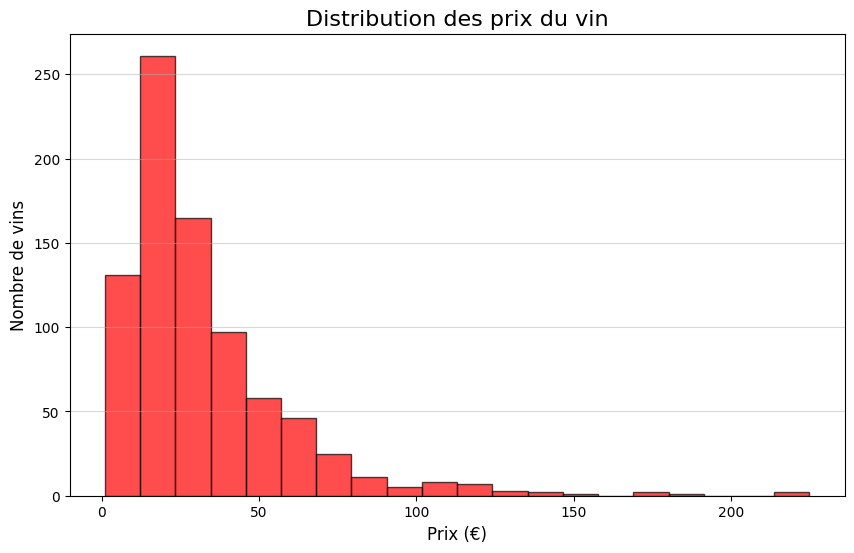

In [ ]:
# 15. Distribution des prix du vin et outliers

plt.figure(figsize=(10, 6))
plt.hist(final['price'], bins=20, color='red', edgecolor='black', alpha=0.7)
plt.title("Distribution des prix du vin", fontsize=16)
plt.xlabel("Prix (€)", fontsize=12)
plt.ylabel("Nombre de vins", fontsize=12)
plt.grid(axis='y', alpha=0.5)
plt.show()

# Analyse de la distribution des prix et détection des valeurs aberrantes (outliers).
# - Un histogramme (histplot) est utilisé pour visualiser la répartition des prix, il
# confirme la présence d'outliers dans les prix du vin qui s'écartent considérablement de la moyenne des prix du vin.

In [ ]:
# Outliers trouvés dans les prix du vin

prices = final['price'].dropna().astype(float)
Q1 = prices.quantile(0.25)
Q3 = prices.quantile(0.75)
IQR = Q3 - Q1
low = Q1 - 1.5 * IQR
high = Q3 + 1.5 * IQR

outliers = final[(final['price'] < low) | (final['price'] > high)][[
    'product_id','sku','price','total_sales','onsale_web','stock_status'
]].sort_values('price', ascending=False)

print(f"Q1={Q1:.2f}, Q3={Q3:.2f}, IQR={IQR:.2f}, Seuil bas={low:.2f}, Seuil haut={high:.2f}")
print(f"Nombre d'outliers détectés: {len(outliers)}")
outliers.head(37)

# 37 outliers ont été trouvés qui correspondent à des vins qui ont des prix élevés (vin de luxe) mais cela peut fausser la moyenne.

Q1=14.60, Q3=42.00, IQR=27.40, Seuil bas=-26.50, Seuil haut=83.10
Nombre d'outliers détectés: 37


,product_id,sku,price,total_sales,onsale_web,stock_status
208,4352,15940,225.0,5.0,1,outofstock
460,5001,14581,217.5,0.0,1,instock
635,5892,14983,191.3,3.0,1,instock
227,4402,3510,176.0,13.0,1,instock
598,5767,15185,175.0,0.0,1,instock
230,4406,7819,157.0,0.0,1,instock
242,4594,NaN,144.0,NaN,1,outofstock
411,4904,14220,137.0,5.0,1,instock
697,6126,14923,135.0,2.0,1,instock
210,4355,12589,126.5,11.0,1,instock


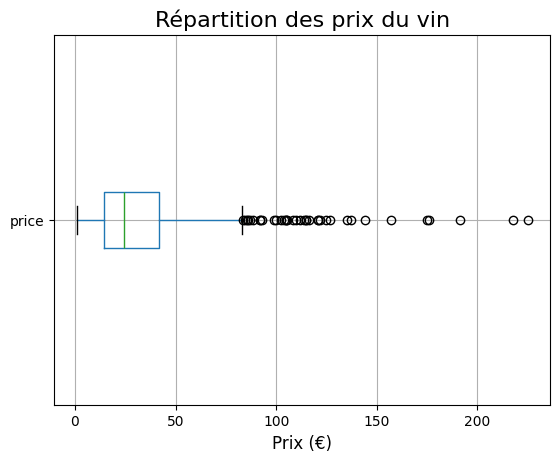

In [ ]:
# Représentation graphique de la répartition des prix du vin avec mise en évidence des outliers

final.boxplot(column="price", vert=False)
plt.title("Répartition des prix du vin", fontsize=16)
plt.xlabel("Prix (€)", fontsize=12)
plt.show()

# Un diagramme en boîte (boxplot) est tracé pour identifier les prix qui se situent
# en dehors de la distribution normale et qui nécessitent une investigation plus approfondie
# La boîte à moustache confirme la présence de ces outliers, qui correspondent à des vins de luxe plus chers.

## ✅ Conclusion du projet

- Le **chiffre d’affaires calculé** s'élève à **70 568,60 €**.  

- Les contrôles effectués ont permis d’identifier plusieurs problèmes dans les fichiers de données :
  - Doublons  
  - SKU mal formés  
  - Valeurs négatives et incohérences (prix, stocks, ventes)  
  - Produits présents uniquement dans un catalogue (ERP ou Web)

La fusion a permis d'obtenir un fichier unique permettant une meilleure analyse des ventes.